<a href="https://colab.research.google.com/github/CodeHunterOfficial/AI_DataMining/blob/main/ML/4_4_OPTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#OPTICS

OPTICS (Ordering Points To Identify the Clustering Structure) — это алгоритм кластеризации, который был разработан для обнаружения плотностных кластеров в данных с произвольной формой. Этот алгоритм является развитием алгоритма DBSCAN, но с улучшениями, которые позволяют лучше работать в сложных ситуациях, таких как данные с различной плотностью кластеров.

Основной целью OPTICS является создание упорядоченной последовательности объектов, которая отражает плотностные структуры данных. Алгоритм сохраняет информацию о плотности данных и упрощает идентификацию кластеров с разной плотностью.

### Основные концепции и термины

Прежде чем перейти к математической части, давайте определим несколько ключевых понятий, которые лежат в основе работы алгоритма OPTICS:

1. **Плотностно-достижимый объект (Density Reachable Object)**:
    - Объект **q** считается плотностно-достижимым из объекта **p** (через некоторое множество объектов), если существует последовательность объектов $\{p_1, p_2, ..., p_n\}$, где $p_1 = p$ и $p_n = q$, и каждый объект $p_{i+1}$ находится на расстоянии не больше $\varepsilon$ от объекта $p_i$, при этом для каждого объекта $p_i$ выполняется условие: его окрестность содержит не менее $MinPts$ объектов.

2. **Core Distance (ядровое расстояние)**:
    - Для объекта **p** ядровое расстояние $\varepsilon_{core}(p)$ — это минимальное расстояние, на котором вокруг объекта **p** содержится минимум $MinPts$ объектов.
    
    $$
    \varepsilon_{core}(p) =
    \begin{cases}
    d(p, MinPts\text{-й ближайший сосед}(p)), & \text{если } |N_{\varepsilon}(p)| \geq MinPts \\
    \infty, & \text{если } |N_{\varepsilon}(p)| < MinPts
    \end{cases}
    $$
    где $N_{\varepsilon}(p)$ — это множество объектов в $\varepsilon$-окрестности объекта **p**.

3. **Reachability Distance (достижимое расстояние)**:
    - Достижимое расстояние объекта **q** от объекта **p** определяется как:
    $$
    reachability\_distance(p, q) = \max(\varepsilon_{core}(p), d(p, q))
    $$
    где $d(p, q)$ — евклидово расстояние между объектами **p** и **q**. Если объект **p** не является ядром, то его достижимое расстояние $\infty$.

### Алгоритм OPTICS

OPTICS работает поэтапно и пытается построить упорядоченный список всех точек, подобный тому, что создается при выполнении алгоритма DBSCAN, но при этом OPTICS записывает дополнительную информацию, такую как ядровое расстояние и достижимое расстояние для каждого объекта.

#### Этапы работы алгоритма:

1. **Инициализация**:
   - Алгоритм начинает с произвольного объекта и вычисляет его $\varepsilon_{core}(p)$. Если $\varepsilon_{core}(p)$ не определено (равно $\infty$), объект считается «шумом».
   
2. **Расширение кластеров**:
   - Для каждого нового объекта **p**, который не был рассмотрен, алгоритм вычисляет достижимые расстояния до всех соседей объекта **p** в радиусе $\varepsilon$.
   - Эти соседи добавляются в очередь, и порядок их обработки зависит от минимального достижимого расстояния (чем меньше, тем раньше точка обрабатывается).
   
3. **Создание упорядоченной последовательности**:
   - OPTICS упорядочивает все точки, таким образом, что кластеры можно определить после построения графика на основе последовательности точек и их достижимых расстояний.

### Математические шаги алгоритма

#### 1. Поиск $\varepsilon_{core}(p)$

Для каждого объекта **p** находим его ядровое расстояние:

$$
\varepsilon_{core}(p) =
\begin{cases}
d(p, MinPts\text{-й ближайший сосед}(p)), & \text{если } |N_{\varepsilon}(p)| \geq MinPts \\
\infty, & \text{если } |N_{\varepsilon}(p)| < MinPts
\end{cases}
$$

#### 2. Вычисление достижимых расстояний

Для каждого объекта **q** из окрестности объекта **p** вычисляется его достижимое расстояние:

$$
reachability\_distance(p, q) = \max(\varepsilon_{core}(p), d(p, q))
$$

#### 3. Очередь обработки

OPTICS использует приоритетную очередь для обработки объектов. В эту очередь добавляются объекты с минимальным достижимым расстоянием.

$$
priority\_queue.push((q, reachability\_distance(p, q)))
$$

#### 4. Обновление достижимых расстояний

Если достижимое расстояние объекта **q** можно уменьшить при рассмотрении другого объекта **p**, то оно обновляется:

$$
reachability\_distance(p, q) = \min(reachability\_distance(p, q), \max(\varepsilon_{core}(p), d(p, q)))
$$

### Псевдокод алгоритма

1. **Инициализация**:
   - Для каждого объекта **p**:
     - Установить $\varepsilon_{core}(p)$
     - Если $\varepsilon_{core}(p) = \infty$, пометить объект как шум.
     - Иначе вычислить достижимое расстояние для соседей и добавить их в очередь.
   
2. **Расширение кластеров**:
   - Пока очередь не пуста:
     - Извлечь объект с минимальным достижимым расстоянием.
     - Добавить объект в упорядоченную последовательность.
     - Обновить достижимые расстояния для его соседей.

3. **Идентификация кластеров**:
   - Построить график достижимых расстояний и определить кластеры на основе скачков в значениях.

### Метрики и критерии

Основные параметры, которые влияют на результаты кластеризации, это:

- **$\varepsilon$** — радиус окрестности объектов, определяющий, какие объекты считаются соседями.
- **MinPts** — минимальное количество точек, необходимых для того, чтобы окрестность объекта считалась достаточно плотной для формирования кластера.

OPTICS не формирует кластеры явно в ходе работы, но сохраняет информацию, которую можно использовать для их выделения после выполнения алгоритма. Метрики, используемые для оценки качества кластеризации OPTICS, включают:

- **Silhouette Score**: Этот индекс измеряет, насколько объекты внутри кластеров схожи друг с другом по сравнению с объектами из других кластеров. Определяется как:

$$
S(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}
$$

где:
- $a(i)$ — среднее расстояние между объектом $i$ и всеми остальными объектами внутри его кластера.
- $b(i)$ — минимальное среднее расстояние между объектом $i$ и объектами в других кластерах.

- **Davies-Bouldin Index (DBI)**: Мера оценки кластеризации, основанная на средней схожести каждого кластера с тем кластером, который к нему наиболее схож.

$$
DBI = \frac{1}{k} \sum_{i=1}^{k} \max_{i \neq j} \frac{s_i + s_j}{d(c_i, c_j)}
$$

где $s_i$ — среднее расстояние между объектами кластера $i$ и его центроидом, $d(c_i, c_j)$ — расстояние между центроидами кластеров $i$ и $j$.

### Заключение

Алгоритм OPTICS предлагает мощный инструмент для выявления плотностных структур данных. В отличие от DBSCAN, он может эффективно работать с данными, содержащими кластеры с различной плотностью, и не требует четкого задания параметра $\varepsilon$ для определения окрестности.



Давайте разберем конкретный числовой пример работы алгоритма OPTICS шаг за шагом. Мы возьмем небольшой набор данных и разберем, как на каждом этапе вычисляются ядровое расстояние ($ \varepsilon_{core} $) и достижимое расстояние ($ reachability\_distance $), а также как строится упорядоченная последовательность точек.

### Дано:
Пусть у нас есть следующие точки на плоскости:

$$
\text{Точки} = \{ A(1, 1), B(2, 1), C(2, 2), D(8, 8), E(8, 9), F(25, 80) \}
$$

#### Параметры:
- $ \varepsilon = 3 $ — радиус окрестности.
- $ MinPts = 2 $ — минимальное количество точек для образования кластера.

Мы будем использовать евклидово расстояние для расчета расстояний между точками.

### Шаг 1: Вычисление расстояний между точками

Мы сначала вычислим все евклидовы расстояния между точками:

$$
d(A, B) = \sqrt{(2 - 1)^2 + (1 - 1)^2} = 1
$$
$$
d(A, C) = \sqrt{(2 - 1)^2 + (2 - 1)^2} = \sqrt{1 + 1} = \sqrt{2} \approx 1.41
$$
$$
d(A, D) = \sqrt{(8 - 1)^2 + (8 - 1)^2} = \sqrt{49 + 49} = \sqrt{98} \approx 9.9
$$
$$
d(A, E) = \sqrt{(8 - 1)^2 + (9 - 1)^2} = \sqrt{49 + 64} = \sqrt{113} \approx 10.63
$$
$$
d(A, F) = \sqrt{(25 - 1)^2 + (80 - 1)^2} = \sqrt{576 + 6241} = \sqrt{6817} \approx 82.56
$$


$$
d(B, C) = \sqrt{(2 - 2)^2 + (2 - 1)^2} = 1
$$
$$
d(B, D) = \sqrt{(8 - 2)^2 + (8 - 1)^2} = \sqrt{36 + 49} = \sqrt{85} \approx 9.22
$$
$$
d(B, E) = \sqrt{(8 - 2)^2 + (9 - 1)^2} = \sqrt{36 + 64} = \sqrt{100} = 10
$$
$$
d(B, F) = \sqrt{(25 - 2)^2 + (80 - 1)^2} = \sqrt{529 + 6241} = \sqrt{6770} \approx 82.29
$$
$$
d(C, D) = \sqrt{(8 - 2)^2 + (8 - 2)^2} = \sqrt{36 + 36} = \sqrt{72} \approx 8.49
$$
$$
d(C, E) = \sqrt{(8 - 2)^2 + (9 - 2)^2} = \sqrt{36 + 49} = \sqrt{85} \approx 9.22
$$
$$
d(C, F) = \sqrt{(25 - 2)^2 + (80 - 2)^2} = \sqrt{529 + 6084} = \sqrt{6613} \approx 81.31
$$
$$
d(D, E) = \sqrt{(8 - 8)^2 + (9 - 8)^2} = 1
$$
$$
d(D, F) = \sqrt{(25 - 8)^2 + (80 - 8)^2} = \sqrt{289 + 5184} = \sqrt{5473} \approx 74.01
$$
$$
d(E, F) = \sqrt{(25 - 8)^2 + (80 - 9)^2} = \sqrt{289 + 5041} = \sqrt{5330} \approx 73.00
$$

Итак, мы вычислили все евклидовы расстояния между точками. Теперь переходим к следующему шагу.

### Шаг 2: Вычисление $\varepsilon_{core}(p)$ для каждой точки

Для каждой точки вычислим ядровое расстояние ($\varepsilon_{core}(p)$), которое определяется минимальным расстоянием, на котором в окрестности точки есть минимум $MinPts = 2$ точек.

#### Для точки $A(1, 1)$:
- Окрестность $A$ радиусом $\varepsilon = 3$ включает точки $B$ и $C$, так как $d(A, B) = 1$ и $d(A, C) \approx 1.41$.
- Поскольку в окрестности есть 2 точки, ядровое расстояние $A$ равно расстоянию до второй ближайшей точки:
$$
\varepsilon_{core}(A) = d(A, C) \approx 1.41
$$

#### Для точки $B(2, 1)$:
- Окрестность $B$ радиусом $\varepsilon = 3$ включает точки $A$ и $C$, так как $d(B, A) = 1$ и $d(B, C) = 1$.
- Ядровое расстояние:
$$
\varepsilon_{core}(B) = d(B, C) = 1
$$

#### Для точки $C(2, 2)$:
- Окрестность $C$ радиусом $\varepsilon = 3$ включает точки $A$ и $B$, так как $d(C, A) \approx 1.41$ и $d(C, B) = 1$.
- Ядровое расстояние:
$$
\varepsilon_{core}(C) = d(C, A) \approx 1.41
$$

#### Для точки $D(8, 8)$:
- Окрестность $D$ радиусом $\varepsilon = 3$ включает только точку $E$, так как $d(D, E) = 1$, но нет второй точки в пределах радиуса $\varepsilon$.
- Следовательно, ядровое расстояние:
$$
\varepsilon_{core}(D) = \infty
$$

#### Для точки $E(8, 9)$:
- Аналогично точке $D$, окрестность $E$ радиусом $\varepsilon = 3$ включает только точку $D$, но не хватает второй точки:
$$
\varepsilon_{core}(E) = \infty
$$

#### Для точки $F(25, 80)$:
- Окрестность $F$ радиусом $\varepsilon = 3$ не включает ни одной другой точки, так как расстояния до других точек значительно превышают $\varepsilon = 3$:
$$
\varepsilon_{core}(F) = \infty
$$

### Шаг 3: Вычисление достижимого расстояния $reachability\_distance(p, q)$

Теперь вычислим достижимое расстояние для каждой пары точек. Достижимое расстояние между двумя точками $p$ и $q$ определяется как:
$$
reachability\_distance(p, q) = \max(\varepsilon_{core}(p), d(p, q))
$$

#### Для точки $A(1, 1)$:
- $reachability\_distance(A, B) = \max(1.41, d(A, B)) = \max(1.41, 1) = 1.41$
- $reachability\_distance(A, C) = \max(1.41, d(A, C)) = \max(1.41, 1.41) = 1.41$

#### Для точки $B(2, 1)$:
- $reachability\_distance(B, A) = \max(1, d(B, A)) = \max(1, 1) = 1$
- $reachability\_distance(B, C) = \max(1, d(B, C)) = \max(1, 1) = 1$

#### Для точки $C(2, 2)$:
- $reachability\_distance(C, A) = \max(1.41, d(C, A)) = \max(1.41, 1.41) = 1.41$
- $reachability\_distance(C, B) = \max(1.41, d(C, B)) = \max(1.41, 1) = 1.41$

#### Для точки $D(8, 8)$:
- Поскольку $\varepsilon_{core}(D) = \infty$, достижимое расстояние до любой другой точки будет $\infty$, за исключением точки $E$:
- $reachability\_distance(D, E) = \max(\infty, d(D, E)) = \infty$

#### Для точки $E(8, 9)$:
- Аналогично $D$, достижимое расстояние для всех точек кроме $D$ будет $\infty$:
- $reachability\_distance(E, D) = \infty$

#### Для точки $F(25, 80)$:
- Достижимое расстояние для всех точек будет $\infty$.

### Шаг 4: Упорядоченная последовательность точек

Алгоритм OPTICS строит упорядоченную последовательность точек на основе вычисленных достижимых расстояний. Обработка точек начинается с произвольной точки, например, с точки $A$, и продолжается до тех пор, пока не будут рассмотрены все точки.

1. **Начало с точки $A$**:
   - $reachability\_distance(A, B) = 1.41$, $reachability\_distance(A, C) = 1.41$.
   - Добавляем $B$ в упорядоченную последовательность, затем $C$.

2. **Переход к точке $B$**:
   - Все ближайшие точки уже добавлены.

3. **Переход к точке $C$**:
   - Все ближайшие точки уже добавлены.

4. **Переход к точкам $D$ и $E$**:
   - Эти точки не связаны с другими точками, так как их достижимые расстояния $\infty$.

5. **Переход к точке $F$**:
   - Эта точка также не связана с другими точками, так как её достижим

ое расстояние до остальных точек равно $\infty$.

Итак, упорядоченная последовательность точек будет выглядеть следующим образом:
$$
A \rightarrow B \rightarrow C \rightarrow D \rightarrow E \rightarrow F
$$

### Шаг 5: Построение кластеров

На основе упорядоченной последовательности точек и их достижимых расстояний можно выделить кластеры. В нашем примере точки $A$, $B$ и $C$ образуют плотную группу (кластер), а точки $D$, $E$ и $F$ остаются изолированными и могут быть помечены как шум.

Таким образом, результат работы алгоритма OPTICS для данного набора точек — это один основной кластер $(A, B, C)$ и несколько изолированных точек $D$, $E$, $F$.





## Часть 1. Реализация алгоритма OPTICS без библиотек

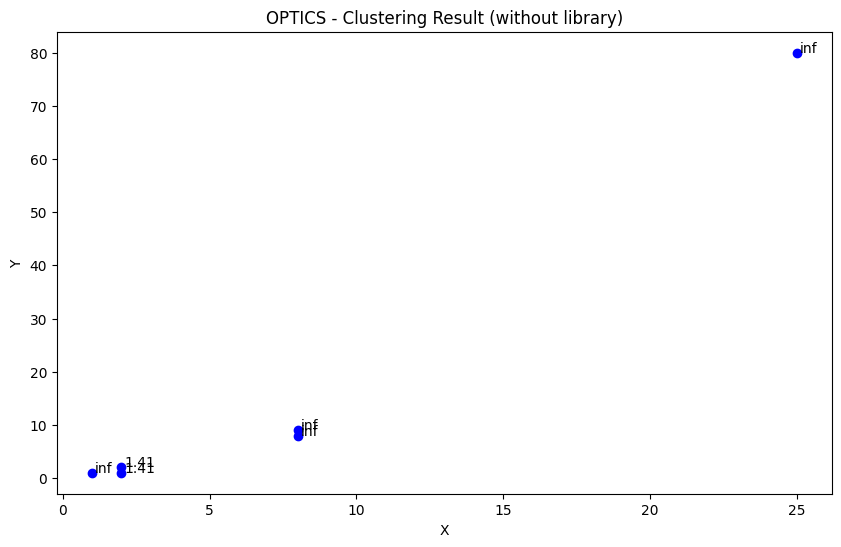

Point 0: Core Distance = 1.4142135623730951
Reachability Distance from Point 0 to Point 1 = 1.4142135623730951
Reachability Distance from Point 0 to Point 2 = 1.4142135623730951
Point 1: Core Distance = 1.4142135623730951
Reachability Distance from Point 1 to Point 0 = 1.4142135623730951
Reachability Distance from Point 1 to Point 2 = 1.4142135623730951
Point 2: Core Distance = 1.0
Reachability Distance from Point 2 to Point 0 = 1.4142135623730951
Reachability Distance from Point 2 to Point 1 = 1.0
Point 3: Core Distance = inf
Reachability Distance from Point 3 to Point 4 = inf
Point 4: Core Distance = inf
Reachability Distance from Point 4 to Point 3 = inf
Point 5: Core Distance = inf


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from math import sqrt, inf

# 1. Функция для вычисления евклидова расстояния
def euclidean_distance(p1, p2):
    return sqrt((p1[0] - p2[0]) ** 2 + (p1[1] - p2[1]) ** 2)

# 2. Функция для нахождения соседей в пределах epsilon-окрестности
def get_neighbors(points, p_idx, epsilon):
    neighbors = []
    for idx, point in enumerate(points):
        if idx != p_idx and euclidean_distance(points[p_idx], point) <= epsilon:
            neighbors.append(idx)
    return neighbors

# 3. Функция для вычисления ядрового расстояния
def core_distance(points, neighbors, min_pts):
    if len(neighbors) < min_pts:
        return inf
    else:
        distances = [euclidean_distance(points[0], points[neighbor]) for neighbor in neighbors]
        distances.sort()
        return distances[min_pts - 1]

# 4. Функция для вычисления достижимого расстояния
def reachability_distance(points, core_dist, p_idx, neighbor_idx):
    return max(core_dist, euclidean_distance(points[p_idx], points[neighbor_idx]))

# 5. Реализация алгоритма OPTICS
def optics(points, epsilon, min_pts):
    n_points = len(points)
    ordered_points = []
    reachability_distances = [inf] * n_points
    processed = [False] * n_points

    for p_idx in range(n_points):
        if processed[p_idx]:
            continue

        processed[p_idx] = True
        ordered_points.append(p_idx)
        neighbors = get_neighbors(points, p_idx, epsilon)
        core_dist = core_distance(points, neighbors, min_pts)

        if core_dist == inf:
            continue  # Точка не является ядровой

        seeds = []
        for neighbor_idx in neighbors:
            if not processed[neighbor_idx]:
                new_reach_dist = reachability_distance(points, core_dist, p_idx, neighbor_idx)
                if new_reach_dist < reachability_distances[neighbor_idx]:
                    reachability_distances[neighbor_idx] = new_reach_dist
                    seeds.append(neighbor_idx)

        while seeds:
            current_idx = seeds.pop(0)
            processed[current_idx] = True
            ordered_points.append(current_idx)
            current_neighbors = get_neighbors(points, current_idx, epsilon)
            current_core_dist = core_distance(points, current_neighbors, min_pts)

            if current_core_dist != inf:
                for neighbor_idx in current_neighbors:
                    if not processed[neighbor_idx]:
                        new_reach_dist = reachability_distance(points, current_core_dist, current_idx, neighbor_idx)
                        if new_reach_dist < reachability_distances[neighbor_idx]:
                            reachability_distances[neighbor_idx] = new_reach_dist
                            seeds.append(neighbor_idx)

    return ordered_points, reachability_distances

# 6. Визуализация результата
def plot_optics(points, reachability_distances, ordered_points):
    plt.figure(figsize=(10, 6))

    for idx, p_idx in enumerate(ordered_points):
        plt.scatter(points[p_idx][0], points[p_idx][1], c='b')
        plt.text(points[p_idx][0] + 0.1, points[p_idx][1] + 0.1, str(round(reachability_distances[p_idx], 2)))

    plt.title("OPTICS - Clustering Result (without library)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Пример данных
points = np.array([[1, 1], [2, 1], [2, 2], [8, 8], [8, 9], [25, 80]])
epsilon = 3
min_pts = 2

# Запуск алгоритма
ordered_points, reachability_distances = optics(points, epsilon, min_pts)

# Визуализация
plot_optics(points, reachability_distances, ordered_points)
def compute_metrics(points, epsilon, min_pts):
    for idx in range(len(points)):
        neighbors = get_neighbors(points, idx, epsilon)
        core_dist = core_distance(points, neighbors, min_pts)
        print(f"Point {idx}: Core Distance = {core_dist}")
        for neighbor_idx in neighbors:
            reach_dist = reachability_distance(points, core_dist, idx, neighbor_idx)
            print(f"Reachability Distance from Point {idx} to Point {neighbor_idx} = {reach_dist}")

# Вычисление метрик
compute_metrics(points, epsilon, min_pts)

## Часть 2. Использование готовой библиотеки (sklearn)
Теперь реализуем тот же алгоритм с помощью библиотеки sklearn.

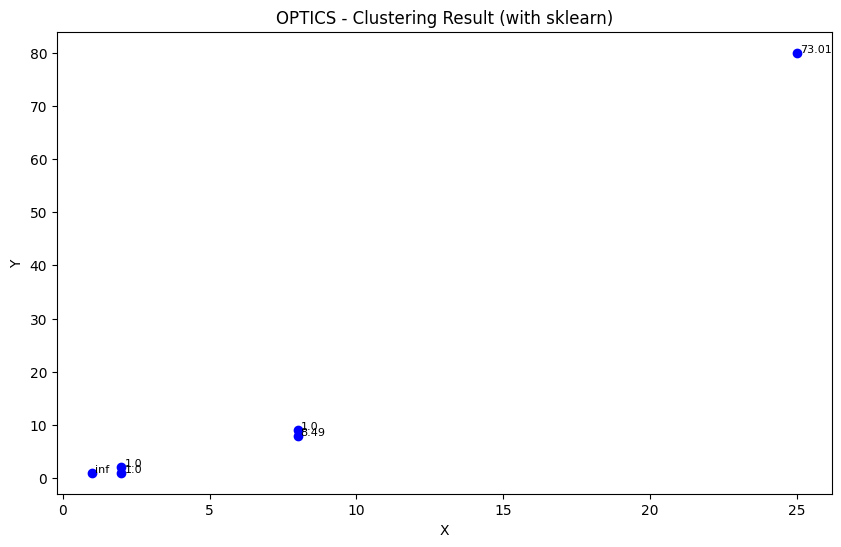

Point 0: Core Distance = 1.0
Reachability Distance from Point 0 to Point 1 = 1.0
Reachability Distance from Point 0 to Point 2 = 1.4142135623730951
Point 1: Core Distance = 1.0
Reachability Distance from Point 1 to Point 0 = 1.0
Reachability Distance from Point 1 to Point 2 = 1.0
Point 2: Core Distance = 1.0
Reachability Distance from Point 2 to Point 0 = 1.4142135623730951
Reachability Distance from Point 2 to Point 1 = 1.0
Point 3: Core Distance = 1.0
Reachability Distance from Point 3 to Point 4 = 1.0
Point 4: Core Distance = 1.0
Reachability Distance from Point 4 to Point 3 = 1.0
Point 5: Core Distance = 73.00684899377592


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import OPTICS

# Пример данных
points = np.array([[1, 1], [2, 1], [2, 2], [8, 8], [8, 9], [25, 80]])

# Параметры
epsilon = 3
min_pts = 2

# Запуск алгоритма OPTICS
optics_model = OPTICS(eps=epsilon, min_samples=min_pts)
optics_model.fit(points)

# Получение меток кластеров и расстояний
labels = optics_model.labels_
reachability = optics_model.reachability_

# Визуализация результата
def plot_optics(points, reachability, labels):
    plt.figure(figsize=(10, 6))

    # Отображение точек
    for idx, point in enumerate(points):
        plt.scatter(point[0], point[1], c='b' if labels[idx] != -1 else 'r', label=f'Cluster {labels[idx]}' if labels[idx] != -1 else 'Noise')

    # Добавление текста с расстояниями
    for idx, p in enumerate(points):
        plt.text(p[0] + 0.1, p[1] + 0.1, str(round(reachability[idx], 2)), fontsize=8)

    plt.title("OPTICS - Clustering Result (with sklearn)")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.show()

# Визуализация
plot_optics(points, reachability, labels)

# Вычисление метрик
def compute_metrics(points, epsilon, min_pts):
    for idx in range(len(points)):
        neighbors = optics_model.reachability_[idx]
        core_dist = optics_model.core_distances_[idx] if idx < len(optics_model.core_distances_) else float('inf')
        print(f"Point {idx}: Core Distance = {core_dist}")
        for neighbor_idx in range(len(points)):
            if idx != neighbor_idx and np.linalg.norm(points[idx] - points[neighbor_idx]) <= epsilon:
                reach_dist = max(core_dist, np.linalg.norm(points[idx] - points[neighbor_idx]))
                print(f"Reachability Distance from Point {idx} to Point {neighbor_idx} = {reach_dist}")

# Вычисление метрик
compute_metrics(points, epsilon, min_pts)

### Вопросы для самопроверки

1. Что такое алгоритм OPTICS и какова его основная цель?
2. Какова основная разница между OPTICS и DBSCAN?
3. Определите, что такое "плотностно-достижимый объект".
4. Как вычисляется ядровое расстояние $\varepsilon_{core}(p)$ для объекта **p**?
5. Что такое достижимое расстояние и как оно определяется?
6. Какие основные этапы работы алгоритма OPTICS?
7. Как происходит инициализация объектов в алгоритме OPTICS?
8. Что такое приоритетная очередь в контексте алгоритма OPTICS и как она используется?
9. Как обновляются достижимые расстояния для соседних объектов?
10. Что происходит на этапе идентификации кластеров в OPTICS?
11. Каковы основные параметры, влияющие на результаты кластеризации в OPTICS?
12. Объясните, что такое Silhouette Score и как он используется для оценки качества кластеризации.
13. Как рассчитывается индекс Davies-Bouldin и для чего он нужен?
14. Какие преимущества дает алгоритм OPTICS при работе с данными различной плотности?
15. Почему OPTICS не формирует кластеры явно в процессе своей работы?

### Задачи для самостоятельной работы

1. Реализуйте алгоритм OPTICS на Python для набора данных из 2D.
2. Сравните результаты кластеризации OPTICS и DBSCAN на одном и том же наборе данных. Каковы различия?
3. Постройте график зависимости достижимых расстояний для набора данных с известными кластерами. Как вы можете идентифицировать кластеры на графике?
4. Выберите набор данных с шумами и примените OPTICS для его кластеризации. Проанализируйте, как алгоритм справляется с шумами.
5. Измените параметры $\varepsilon$ и MinPts для алгоритма OPTICS и наблюдайте за изменениями в получаемых кластерах.
6. Создайте собственный набор данных с кластерами различной плотности и примените к нему алгоритм OPTICS. Опишите результаты.
7. Сравните Silhouette Score для кластеров, полученных с помощью OPTICS, и DBSCAN. Какой алгоритм дает лучшие результаты?
8. Реализуйте графическое представление достижимых расстояний и ядровых расстояний для выборки данных.
9. Найдите набор данных, содержащий сложные формы кластеров, и примените к нему алгоритм OPTICS.
10. Обсудите, как бы вы применили алгоритм OPTICS в задачах машинного обучения, например, для сегментации изображений.
11. Изучите различные метрики, такие как Silhouette Score и Davies-Bouldin Index, и сравните их результаты для кластеров, полученных с помощью OPTICS.
12. Разработайте модель, которая использует результаты кластеризации OPTICS для предсказания меток классов новых объектов.
13. Измените алгоритм OPTICS, чтобы он возвращал не только кластеры, но и их иерархическую структуру.
14. Проведите анализ чувствительности к параметрам алгоритма OPTICS, исследуя, как изменения в $\varepsilon$ и MinPts влияют на результаты.
15. Изучите применение алгоритма OPTICS в реальных задачах, например, в анализе биомедицинских данных или финансовых данных.
16. Попробуйте адаптировать алгоритм OPTICS для работы с временными рядами. Как можно использовать его для кластеризации временных данных?
17. Сравните OPTICS с другими алгоритмами кластеризации, такими как K-Means и Hierarchical Clustering, по критериям качества и времени выполнения.
18. Реализуйте адаптацию алгоритма OPTICS для высокоразмерных данных и оцените его эффективность.
19. Опишите, как можно визуализировать результаты кластеризации, полученные с помощью OPTICS.
20. Изучите, как алгоритм OPTICS может быть использован в задачах аномального обнаружения.
21. Создайте несколько сценариев тестирования для алгоритма OPTICS и опишите результаты.
22. Исследуйте возможность интеграции OPTICS в фреймворк машинного обучения, такой как scikit-learn.
23. Примените алгоритм OPTICS к набору данных о преступности в городе и проанализируйте результаты.
24. Обсудите, как настройки алгоритма OPTICS могут повлиять на обнаружение кластеров в условиях шума.
25. Попробуйте применять OPTICS для кластеризации текстовых данных (например, новостных статей) и оцените качество кластеризации.
26. Создайте метод оценки стабильности кластеров, полученных с помощью OPTICS.
27. Изучите возможности использования OPTICS в сочетании с методами уменьшения размерности, такими как PCA.
28. Проведите исследование по оптимизации производительности алгоритма OPTICS для больших объемов данных.
29. Опишите, как изменения в способах определения расстояния (например, использование манхэттенского расстояния) могут повлиять на результаты кластеризации.
30. Проведите эксперименты с различными способами инициализации и настройки параметров алгоритма OPTICS, и проанализируйте результаты.